In [2]:
import pandas as pd

# Load dataset from URL
url = "cleaned_twitter_data.csv"  # Replace with your dataset URL
df = pd.read_csv(url)

# Inspect the data
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop missing values if any
df.dropna(inplace=True)

# Map labels to integers
label_mapping = {
    "Neutral or Ambiguous": 0,
    "Offensive or Hate Speech": 1,
    "Not Hate": 2
}
df['labels_encoded'] = df['labels'].map(label_mapping)

          username                                              tweet  \
0    @mayasolovely  RT As a woman you shouldnt complain about clea...   
1         @mleew17  RT boy dats coldtyga dwn bad for cuffin dat ho...   
2   @UrKindOfBrand  RT Dawg RT You ever fuck a bitch and she start...   
3    @C_G_Anderson                          RT she look like a tranny   
4  @ShenikaRoberts  RT The shit you hear about me might be true or...   

                     labels  
0      Neutral or Ambiguous  
1  Offensive or Hate Speech  
2  Offensive or Hate Speech  
3  Offensive or Hate Speech  
4  Offensive or Hate Speech  
username    211913
tweet            0
labels           0
dtype: int64


In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define hyperparameters
max_vocab_size = 10000
max_sequence_length = 100
embedding_dim = 100
batch_size = 32

# Tokenization
tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df['tweet'])
sequences = tokenizer.texts_to_sequences(df['tweet'])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, df['labels_encoded'], test_size=0.2, random_state=42
)
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

# LSTM Model
lstm_model = Sequential([
    Embedding(max_vocab_size, embedding_dim, input_length=max_sequence_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(64)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

# Compile and Train
lstm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
lstm_model.summary()
lstm_model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_split=0.2)

d:\FALL2024\DEEPLEARNING\deeplearning project\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 71s 107ms/step - accuracy: 0.7073 - loss: 0.6680 - val_accuracy: 0.8303 - val_loss: 0.4281
Epoch 2/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 62s 100ms/step - accuracy: 0.8851 - loss: 0.3110 - val_accuracy: 0.8706 - val_loss: 0.3670
Epoch 3/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 64s 104ms/step - accuracy: 0.9354 - loss: 0.1951 - val_accuracy: 0.8684 - val_loss: 0.3803
Epoch 4/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 61s 100ms/step - accuracy: 0.9574 - loss: 0.1320 - val_accuracy: 0.8783 - val_loss: 0.4131
Epoch 5/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 63s 102ms/step - accuracy: 0.9697 - loss: 0.0978 - val_accuracy: 0.8747 - val_loss: 0.4710
Epoch 6/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.9764 - loss: 0.0725 - val_accuracy: 0.8816 - val_loss: 0.4837
Epoch 7/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.9800 - loss: 0.0603 - val_accuracy: 0.8702 - val_loss: 0.5459
Epoch 8/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 29s 48ms/step - accuracy: 0.9834 - loss: 0.04

193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step


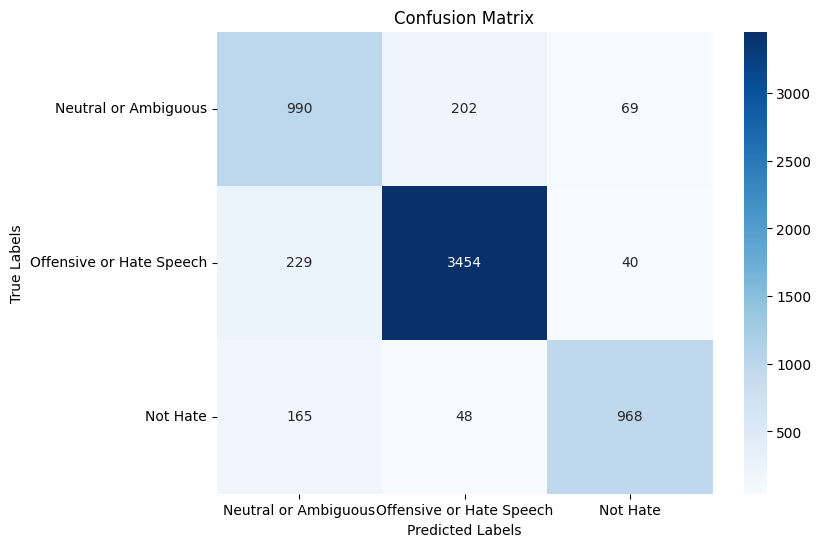

Classification Report:

                          precision    recall  f1-score   support

    Neutral or Ambiguous       0.72      0.79      0.75      1261
Offensive or Hate Speech       0.93      0.93      0.93      3723
                Not Hate       0.90      0.82      0.86      1181

                accuracy                           0.88      6165
               macro avg       0.85      0.84      0.85      6165
            weighted avg       0.88      0.88      0.88      6165


ROC-AUC Score: 0.9510


In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred_probs = lstm_model.predict(X_test, batch_size=batch_size)
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class predictions
y_true_classes = np.argmax(y_test, axis=1)        # Ground truth labels

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_mapping.keys()))

# ROC-AUC Score
# Compute ROC-AUC for each class
if y_test.shape[1] > 2:  # Multiclass ROC-AUC
    roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
else:  # Binary ROC-AUC
    roc_auc = roc_auc_score(y_test[:, 1], y_pred_probs[:, 1])

print(f"\nROC-AUC Score: {roc_auc:.4f}")

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Step 1: Define a function to preprocess and predict the label of unseen text
def preprocess_and_predict(model, unseen_text, tokenizer, max_sequence_length=100):
    # Tokenize the unseen text
    sequence = tokenizer.texts_to_sequences([unseen_text])  # Convert text to sequence
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length, padding='post')  # Pad sequence
    
    # Predict class probabilities
    y_pred_probs = model.predict(padded_sequence)
    
    # Get predicted class (index of the max probability)
    y_pred_class = np.argmax(y_pred_probs, axis=1)
    
    # Map predicted class index back to label
    label_mapping = {
        0: "Neutral or Ambiguous",
        1: "Offensive or Hate Speech",
        2: "Not Hate"
    }
    predicted_label = label_mapping[y_pred_class[0]]
    
    return predicted_label, y_pred_probs[0]

# Example usage:
unseen_text = "girls only belong to kitchen"
predicted_label, predicted_probs = preprocess_and_predict(lstm_model, unseen_text, tokenizer)

# Print the prediction results
print(f"Predicted Label: {predicted_label}")
print(f"Predicted Probabilities: {predicted_probs}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Label: Offensive or Hate Speech
Predicted Probabilities: [0.00545773 0.9895558  0.00498642]


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Bidirectional

# Define the LSTM+CNN model
lstm_cnn_model = Sequential([
    # Embedding Layer
    Embedding(max_vocab_size, embedding_dim, input_length=max_sequence_length),
    
    # Bidirectional LSTM Layer
    Bidirectional(LSTM(64, return_sequences=True)),  # Outputs sequences
    
    # Convolutional Layer
    Conv1D(filters=128, kernel_size=5, activation='relu'),  # Kernel size defines the "n-gram" size
    MaxPooling1D(pool_size=2),  # Reduces dimensionality
    
    # Flatten to feed into Dense Layers
    Flatten(),
    
    # Fully Connected Layer
    Dense(64, activation='relu'),
    Dropout(0.5),  # To prevent overfitting
    
    # Output Layer
    Dense(3, activation='softmax')  # 3 classes
])

# Compile the model
lstm_cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Model Summary
lstm_cnn_model.summary()

# Train the model
lstm_cnn_model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_split=0.2)


d:\FALL2024\DEEPLEARNING\deeplearning project\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.7021 - loss: 0.6861 - val_accuracy: 0.8226 - val_loss: 0.4275
Epoch 2/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.8623 - loss: 0.3609 - val_accuracy: 0.8613 - val_loss: 0.3725
Epoch 3/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.9250 - loss: 0.2157 - val_accuracy: 0.8581 - val_loss: 0.4101
Epoch 4/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9472 - loss: 0.1447 - val_accuracy: 0.8765 - val_loss: 0.5176
Epoch 5/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9682 - loss: 0.0901 - val_accuracy: 0.8733 - val_loss: 0.5810
Epoch 6/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9766 - loss: 0.0683 - val_accuracy: 0.8741 - val_loss: 0.6530
Epoch 7/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9799 - loss: 0.0566 - val_accuracy: 0.8824 - val_loss: 0.8097
Epoch 8/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9852 - loss: 0.0421 - 

193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8805 - loss: 0.8861
Test Loss: 0.9161, Test Accuracy: 0.8761
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


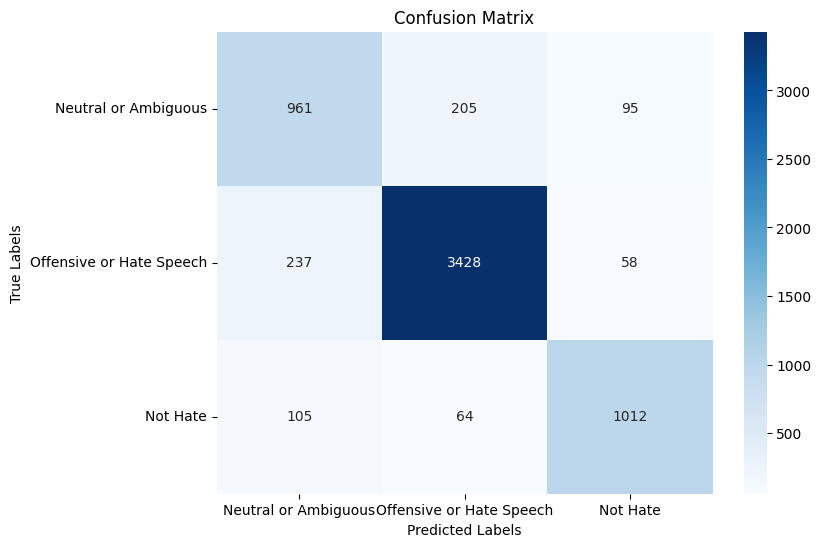

Classification Report:

                          precision    recall  f1-score   support

    Neutral or Ambiguous       0.74      0.76      0.75      1261
Offensive or Hate Speech       0.93      0.92      0.92      3723
                Not Hate       0.87      0.86      0.86      1181

                accuracy                           0.88      6165
               macro avg       0.84      0.85      0.85      6165
            weighted avg       0.88      0.88      0.88      6165

ROC-AUC Score: 0.9500


In [8]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the model on test data
test_loss, test_accuracy = lstm_cnn_model.evaluate(X_test, y_test, batch_size=batch_size)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Predictions on test data
y_pred_probs = lstm_cnn_model.predict(X_test, batch_size=batch_size)
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Predicted class labels
y_true_classes = np.argmax(y_test, axis=1)        # True class labels

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_mapping.keys()))

# ROC-AUC Score
if y_test.shape[1] > 2:  # Multiclass ROC-AUC
    roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
else:  # Binary ROC-AUC
    roc_auc = roc_auc_score(y_test[:, 1], y_pred_probs[:, 1])
print(f"ROC-AUC Score: {roc_auc:.4f}")


In [9]:
# Example of unseen text
unseen_texts = [
    "I completely disagree with this view!",
    "What a beautiful day!",
    "You are absolutely horrible and disgusting!",
    "america is fucking filthy nation filled with dirty politics"
]

# Preprocess unseen text
unseen_sequences = tokenizer.texts_to_sequences(unseen_texts)
unseen_padded = pad_sequences(unseen_sequences, maxlen=max_sequence_length, padding='post')

# Predict using the trained model
unseen_pred_probs = lstm_cnn_model.predict(unseen_padded)
unseen_pred_classes = np.argmax(unseen_pred_probs, axis=1)  # Get class predictions

# Map predicted labels back to original class names
predicted_labels = [list(label_mapping.keys())[label] for label in unseen_pred_classes]

# Print results
for i, text in enumerate(unseen_texts):
    print(f"Text: {text}")
    print(f"Predicted Label: {predicted_labels[i]} (Confidence: {max(unseen_pred_probs[i]):.4f})\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Text: I completely disagree with this view!
Predicted Label: Not Hate (Confidence: 1.0000)

Text: What a beautiful day!
Predicted Label: Neutral or Ambiguous (Confidence: 0.7099)

Text: You are absolutely horrible and disgusting!
Predicted Label: Neutral or Ambiguous (Confidence: 0.6691)

Text: america is fucking filthy nation filled with dirty politics
Predicted Label: Offensive or Hate Speech (Confidence: 0.9000)



In [18]:
lstm_cnn_model.save("final_model.h5")

In [10]:
from transformers import BertTokenizer, TFBertForSequenceClassification, create_optimizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Function to preprocess texts
def preprocess_texts(texts, tokenizer, max_length=128):
    return tokenizer(
        texts.tolist(),
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors="tf"
    )



# Encode labels as integers
label_mapping = {
    "Neutral or Ambiguous": 0,
    "Offensive or Hate Speech": 1,
    "Not Hate": 2
}
df["labels_encoded"] = df["labels"].map(label_mapping)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df["tweet"], df["labels_encoded"], test_size=0.2, random_state=42
)

# Preprocess the text data
train_encodings = preprocess_texts(X_train, tokenizer)
test_encodings = preprocess_texts(X_test, tokenizer)

# Convert labels to TensorFlow tensors
train_labels = tf.convert_to_tensor(y_train.values)
test_labels = tf.convert_to_tensor(y_test.values)

In [11]:
# Load BERT model for classification
model = TFBertForSequenceClassification.from_pretrained(
    "bert-base-uncased", num_labels=3
)

# Create an optimizer using Hugging Face's helper
batch_size = 16
epochs = 3
learning_rate = 5e-5
num_train_steps = len(train_encodings["input_ids"]) // batch_size * epochs
num_warmup_steps = int(0.1 * num_train_steps)

optimizer, schedule = create_optimizer(
    init_lr=learning_rate,
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps
)

# Compile the model
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
# Train the model
history = model.fit(
    x={"input_ids": train_encodings["input_ids"], "attention_mask": train_encodings["attention_mask"]},
    y=train_labels,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size
)

# Evaluate the model
evaluation = model.evaluate(
    x={"input_ids": test_encodings["input_ids"], "attention_mask": test_encodings["attention_mask"]},
    y=test_labels
)

print(f"Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}")

# Predictions on unseen text
unseen_texts = ["This is a neutral statement.", "This might be offensive."]
unseen_encodings = preprocess_texts(pd.Series(unseen_texts), tokenizer)

predictions = model.predict(
    {"input_ids": unseen_encodings["input_ids"], "attention_mask": unseen_encodings["attention_mask"]}
).logits

predicted_classes = tf.argmax(predictions, axis=1).numpy()
predicted_labels = [list(label_mapping.keys())[list(label_mapping.values()).index(c)] for c in predicted_classes]

# Output predictions for unseen texts
for text, label in zip(unseen_texts, predicted_labels):
    print(f"Text: {text} -> Prediction: {label}")

Epoch 1/3


1233/1233 [==============================] - 4135s 3s/step - loss: 0.4942 - accuracy: 0.7899 - val_loss: 0.3313 - val_accuracy: 0.8686
Epoch 2/3
1233/1233 [==============================] - 4431s 4s/step - loss: 0.2421 - accuracy: 0.9113 - val_loss: 0.2738 - val_accuracy: 0.9124
Epoch 3/3
193/193 [==============================] - 282s 1s/step - loss: 0.2773 - accuracy: 0.9247
Test Loss: 0.2772904932498932, Test Accuracy: 0.9247364401817322
1/1 [==============================] - 3s 3s/step
Text: This is a neutral statement. -> Prediction: Neutral or Ambiguous
Text: This might be offensive. -> Prediction: Neutral or Ambiguous


In [17]:

# Predictions on unseen text
unseen_texts = [
    "I completely disagree with this view!",
    "What a beautiful day!",
    "You are absolutely horrible and disgusting!",
    "america is fucking filthy nation filled with dirty politics",
    "All the gays should be hanged to death"
]

unseen_encodings = preprocess_texts(pd.Series(unseen_texts), tokenizer)

predictions = model.predict(
    {"input_ids": unseen_encodings["input_ids"], "attention_mask": unseen_encodings["attention_mask"]}
).logits

predicted_classes = tf.argmax(predictions, axis=1).numpy()
predicted_labels = [list(label_mapping.keys())[list(label_mapping.values()).index(c)] for c in predicted_classes]

# Output predictions for unseen texts
for text, label in zip(unseen_texts, predicted_labels):
    print(f"Text: {text} -> Prediction: {label}")

1/1 [==============================] - 0s 62ms/step
Text: I completely disagree with this view! -> Prediction: Neutral or Ambiguous
Text: What a beautiful day! -> Prediction: Neutral or Ambiguous
Text: You are absolutely horrible and disgusting! -> Prediction: Neutral or Ambiguous
Text: america is fucking filthy nation filled with dirty politics -> Prediction: Offensive or Hate Speech
Text: All the gays should be hanged to death -> Prediction: Offensive or Hate Speech
